# Lecture 13: Control

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Booleans

In [2]:
x = 3
y = 4
y > x


True

In [3]:
10/2 != y

True

In [4]:
'Dog' > 'Cat'

True

In [5]:
'Dog' > 'Catastrophe' > 'Cat'

True

A. True  
B. False

In [6]:
a = np.arange(11, 50)
a

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49])

In [7]:
a > 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
a == 15

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
def teen(x):
    return 13 <= x <= 19

[teen(10), teen(15), teen(20)]

[False, True, False]

In [10]:
ages = Table().with_column('Age', a)
ages

Age
11
12
13
14
15
16
17
18
19
20


In [11]:
ages = ages.with_column('Teenager', ages.apply(teen, 'Age'))
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


## Combining Booleans

In [12]:
x = 3
y = 4

In [13]:
x < 4 and y > 4

False

In [14]:
x < 4 or y > 4

True

In [15]:
not (x < 4 or y > 4)

False

In [16]:
True + 0

1

In [17]:
False + 0

0

In [18]:
sum([False, True, True, False, True])

3

A. 0  
B. 1  
C. 2  
D. 3  
E. 4  

In [19]:
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


In [20]:
ages.column('Teenager')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
sum(ages.column('Teenager'))

7

In [22]:
np.count_nonzero(ages.column('Teenager'))

7

## Random choice

In [23]:
coin = make_array('Heads', 'Tails')
coin

array(['Heads', 'Tails'], dtype='<U5')

In [24]:
np.random.choice(coin)

'Tails'

In [25]:
np.random.choice(coin, 10)

array(['Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails'], dtype='<U5')

In [26]:
d6 = np.arange(1,6+1)
d6

array([1, 2, 3, 4, 5, 6])

In [27]:
np.random.choice(d6, 3)

array([4, 4, 5])

What are the possible results?

A. 1-6  
B. 1-18  
C. multiples of 3 between 1-18  
D. 3-18  
E. none of the above

What if we made the code be:

In [28]:
sum(np.random.choice(d6, 3))

9

In [29]:
two_groups = make_array('treatment', 'control')
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'control', 'control', 'treatment', 'control',
       'treatment', 'control', 'treatment', 'control'], dtype='<U9')

In [30]:
outcomes == 'control'

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True])

In [31]:
#sum(outcomes)

In [32]:
sum(outcomes == 'control')

7

In [33]:
sum(outcomes == 'treatment')

3

## Discussion Question

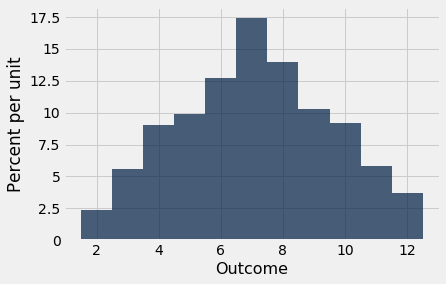

In [34]:
outcomes = np.random.choice(d6, 1000) + np.random.choice(d6, 1000)
Table().with_column('Outcome', outcomes).hist('Outcome', bins=np.arange(1.5,13))

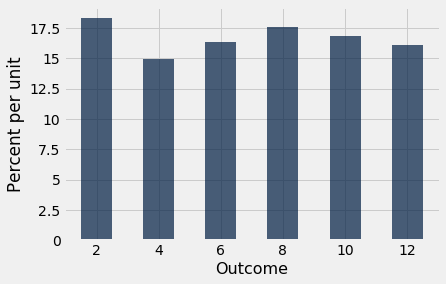

In [35]:
outcomes = 2 * np.random.choice(d6, 1000)
Table().with_column('Outcome', outcomes).hist('Outcome', bins=np.arange(1.5,13))

## Conditional Statements

In [36]:
x = 42
if x > 0:
    print('positive')
elif x < 0:
    print('negative')
else:
    print('zero')

positive


In [37]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

In [38]:
sign(-3)

'negative'

## For Statements

In [39]:
np.arange(4)

array([0, 1, 2, 3])

In [40]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [41]:
coin

array(['Heads', 'Tails'], dtype='<U5')

In [42]:
sum(np.random.choice(coin, 100) == 'Heads')

45

That was one experiment (flipping 100 times).  What if we wanted to repeat 10,000 experiments, and produce a table of results?

In [43]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([52])

In [44]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([52, 50])

In [45]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([55., 56., 54., ..., 54., 49., 45.])

In [46]:
len(num_heads)

10000

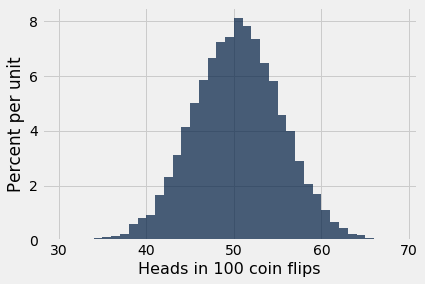

In [47]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [48]:
most = t.group('Heads in 100 coin flips')\
        .where('Heads in 100 coin flips', are.between(40, 60))
most.show()

Heads in 100 coin flips,count
40,94
41,165
42,231
43,312
44,415
45,501
46,586
47,666
48,723
49,742


In [49]:
sum(most.column('count')) / t.num_rows * 100

95.15

In [50]:
#noaccident that it's 95%

## Predicates (additional material)

In [51]:
ages

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


In [52]:
sortof_young = are.between(35, 45)
ages.where('Age', sortof_young)

Age,Teenager
35,False
36,False
37,False
38,False
39,False
40,False
41,False
42,False
43,False
44,False


In [53]:
sortof_young(38)

True

In [54]:
sortof_young(45)

False

In [55]:
ages.apply(sortof_young, 'Age')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False])

In [56]:
sum(ages.apply(sortof_young, 'Age'))

10

In [57]:
teen

<function __main__.teen>

In [58]:
ages.where('Age', teen)

Age,Teenager
13,True
14,True
15,True
16,True
17,True
18,True
19,True
